In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder

In [58]:
pd.set_option("display.max_columns", 30)
pd.set_option("display.max_rows", 30)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train = train.drop(columns=['Id'])

In [49]:
len(train)

1460

In [53]:
train['MSSubClass'].isna().sum()

0

In [55]:
null_cols = [col for col in train.columns if train[col].isna().sum() > len(train)*0.7]

In [78]:
obj_cols = [col for col in train.columns if train[col].dtype == 'object']

In [82]:
train_dummies = pd.get_dummies(train, columns = obj_cols)

In [85]:
unique_cols = [col for col in train.columns if train[col].nunique() == 1]

In [112]:
col = 'OverallQual'
abs(train_dummies.set_index(col).reset_index().corr()).sort_values(by=col,ascending= False)[col].head(20)

OverallQual         1.000000
new                 0.810165
SalePrice           0.790982
ExterQual_TA        0.646247
GarageCars          0.600671
GrLivArea           0.593007
YearBuilt           0.572323
Foundation_PConc    0.568211
GarageArea          0.562022
KitchenQual_TA      0.553891
YearRemodAdd        0.550684
FullBath            0.550600
GarageYrBlt         0.547766
ExterQual_Gd        0.547731
TotalBsmtSF         0.537808
BsmtQual_TA         0.497957
1stFlrSF            0.476224
BsmtQual_Ex         0.470780
HeatingQC_Ex        0.458225
BsmtFinType1_GLQ    0.433448
Name: OverallQual, dtype: float64

In [109]:
train_dummies['GrLivArea'].value_counts(0)

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64

In [110]:
train_dummies['new'] = train_dummies['GrLivArea'] * train_dummies['OverallQual']

In [111]:
col = 'SalePrice'
abs(train_dummies.set_index(col).reset_index().corr()).sort_values(by=col,ascending= False)[col].head(20)

SalePrice           1.000000
new                 0.832057
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
ExterQual_TA        0.589044
FullBath            0.560664
BsmtQual_Ex         0.553105
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
KitchenQual_TA      0.519298
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
GarageYrBlt         0.486362
MasVnrArea          0.477493
Fireplaces          0.466929
Name: SalePrice, dtype: float64

In [97]:
abs(train_dummies.set_index('SalePrice').reset_index().corr()).sort_values(by='SalePrice',ascending= False)['SalePrice'].head(20)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
ExterQual_TA        0.589044
FullBath            0.560664
BsmtQual_Ex         0.553105
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
KitchenQual_TA      0.519298
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
GarageYrBlt         0.486362
MasVnrArea          0.477493
Fireplaces          0.466929
ExterQual_Gd        0.452466
Name: SalePrice, dtype: float64

abs(train_dummies.set_index('SalePrice').reset_index().corr()).sort_values(by='SalePrice',ascending= False)

In [45]:
houseStyle = train['HouseStyle']


In [ ]:
cat_encoder = OneHotEncoder()

In [39]:
train.loc[
    (train['HouseStyle'] == 'SFoyer'),
    ['MSSubClass', 'HouseStyle', 'YearBuilt']]['HouseStyle'].value_counts()

SFoyer    37
Name: HouseStyle, dtype: int64

<AxesSubplot: >

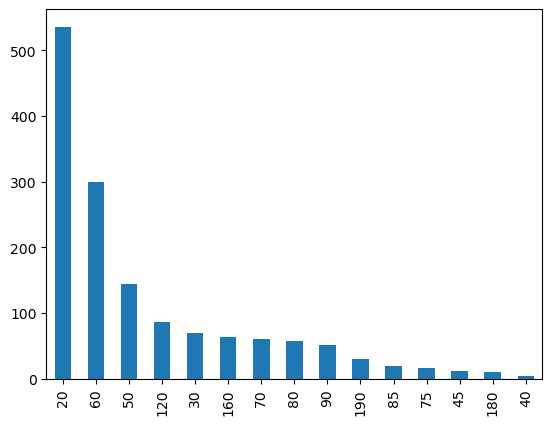

In [7]:
train.MSSubClass.value_counts().plot(kind='bar')

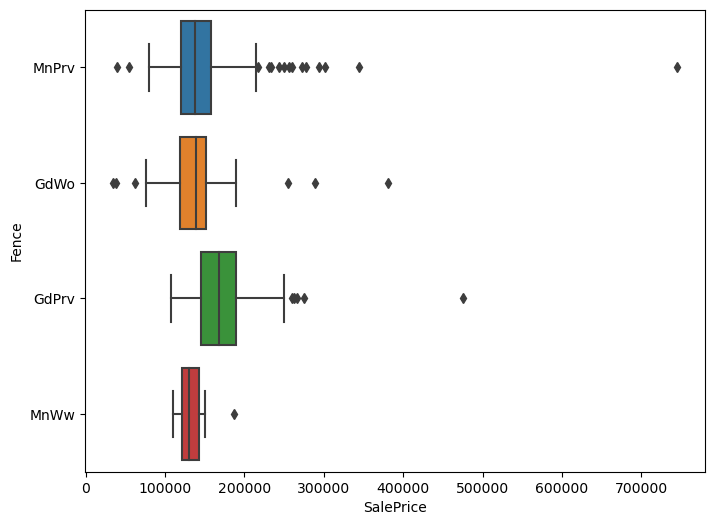

In [19]:
fig, ax = plt.subplots(1, figsize=(8, 6))
sns.boxplot(x='SalePrice', y='Fence', data=train)
plt.show()

In [22]:
train.corr().abs().unstack()

C:\Users\D568\AppData\Local\Temp\ipykernel_12700\2621799328.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr().abs().unstack()


Id         Id             1.000000
           MSSubClass     0.011156
           LotFrontage    0.010601
           LotArea        0.033226
           OverallQual    0.028365
                            ...   
SalePrice  PoolArea       0.092404
           MiscVal        0.021190
           MoSold         0.046432
           YrSold         0.028923
           SalePrice      1.000000
Length: 1444, dtype: float64